### Objective is to classify the news whether real or fake

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# data loading
data = pd.read_csv('kaggle_fake_train.csv')
data.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [3]:
# lets build the model on title and label
data_filtered = data.copy(deep= True)
data_filtered.drop(columns = ['id', 'author', 'text'],axis = 1, inplace = True)
data_filtered.head()

,title,label
0,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",0
2,Why the Truth Might Get You Fired,1
3,15 Civilians Killed In Single US Airstrike Hav...,1
4,Iranian woman jailed for fictional unpublished...,1


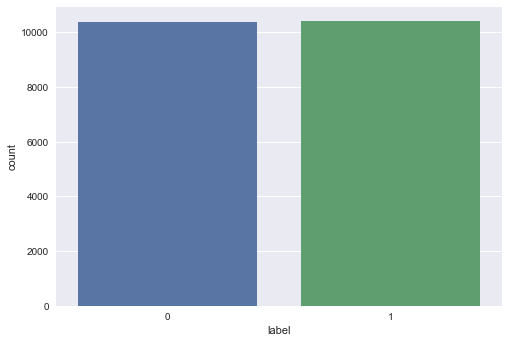

In [4]:
plt.style.use('seaborn')
sns.countplot(x = 'label', data = data_filtered)
plt.show()

In [5]:
data_filtered.isna().sum()

title    558
label      0
dtype: int64

In [6]:
data_filtered.dropna(inplace= True)
data_filtered.isna().sum()

title    0
label    0
dtype: int64

In [7]:
print('original data shape: {}'.format(data.shape))
print('shape of the data after handling nulls : {}'.format(data_filtered.shape))

original data shape: (20800, 5)
shape of the data after handling nulls : (20242, 2)


In [8]:
data_filtered.head()

,title,label
0,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",0
2,Why the Truth Might Get You Fired,1
3,15 Civilians Killed In Single US Airstrike Hav...,1
4,Iranian woman jailed for fictional unpublished...,1


In [9]:
data_filtered.reset_index(inplace = True)

In [10]:
data_filtered.head()

,index,title,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",0
2,2,Why the Truth Might Get You Fired,1
3,3,15 Civilians Killed In Single US Airstrike Hav...,1
4,4,Iranian woman jailed for fictional unpublished...,1


In [11]:
import nltk
import re
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LOKESH\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [12]:
corpus = []
ps = PorterStemmer()

for i in range(0,data_filtered.shape[0]):

  # Cleaning special character from the news-title
  title = re.sub(pattern='[^a-zA-Z]', repl=' ', string=data_filtered.title[i])

  # Converting the entire news-title to lower case
  title = title.lower()

  # Tokenizing the news-title by words
  words = title.split()

  # Removing the stopwords
  words = [word for word in words if word not in set(stopwords.words('english'))]

  # Stemming the words
  words = [ps.stem(word) for word in words]

  # Joining the stemmed words
  title = ' '.join(words)

  # Building a corpus of news-title
  corpus.append(title)

In [13]:
corpus[:10]

['hous dem aid even see comey letter jason chaffetz tweet',
 'flynn hillari clinton big woman campu breitbart',
 'truth might get fire',
 'civilian kill singl us airstrik identifi',
 'iranian woman jail fiction unpublish stori woman stone death adulteri',
 'jacki mason hollywood would love trump bomb north korea lack tran bathroom exclus video breitbart',
 'life life luxuri elton john favorit shark pictur stare long transcontinent flight',
 'beno hamon win french socialist parti presidenti nomin new york time',
 'excerpt draft script donald trump q ampa black church pastor new york time',
 'back channel plan ukrain russia courtesi trump associ new york time']

In [16]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features= 1000, ngram_range= (1,3))
X = cv.fit_transform(corpus).toarray()
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [17]:
X.ndim

2

In [19]:
X.shape

(20242, 1000)

In [24]:
y = data_filtered['label']
y

0        1
1        0
2        1
3        1
4        1
        ..
20237    0
20238    0
20239    0
20240    1
20241    1
Name: label, Length: 20242, dtype: int64

In [25]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)

In [139]:
X_test

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [27]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
model = nb.fit(X_train,y_train)

In [28]:
print('training score: {}'.format(model.score(X_train, y_train)))
print('testing score: {}'.format(model.score(X_test, y_test)))

training score: 0.8858148582720928
testing score: 0.8812052358607063


In [29]:
y_pred = model.predict(X_test)

In [30]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1817,  280],
       [ 201, 1751]], dtype=int64)

In [31]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.87      0.88      2097
           1       0.86      0.90      0.88      1952

    accuracy                           0.88      4049
   macro avg       0.88      0.88      0.88      4049
weighted avg       0.88      0.88      0.88      4049



In [33]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.8812052358607063


In [34]:
print(y_test[:10])

5821     1
15193    1
15230    1
9145     1
14637    1
9300     1
19969    0
13264    0
5606     1
17858    1
Name: label, dtype: int64


In [154]:
print(y_pred[:10])

[1 1 1 1 1 1 0 0 0 1]


### There is misclassification because our model performance was 88% :)